In [1]:
library(ggplot2)
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 1: Optimal number of HCP

HCP,Count
<dbl>,<int>
5,86146
10,89726
15,91373
20,91911
25,92221
30,92567
35,92868
40,92743
45,92713


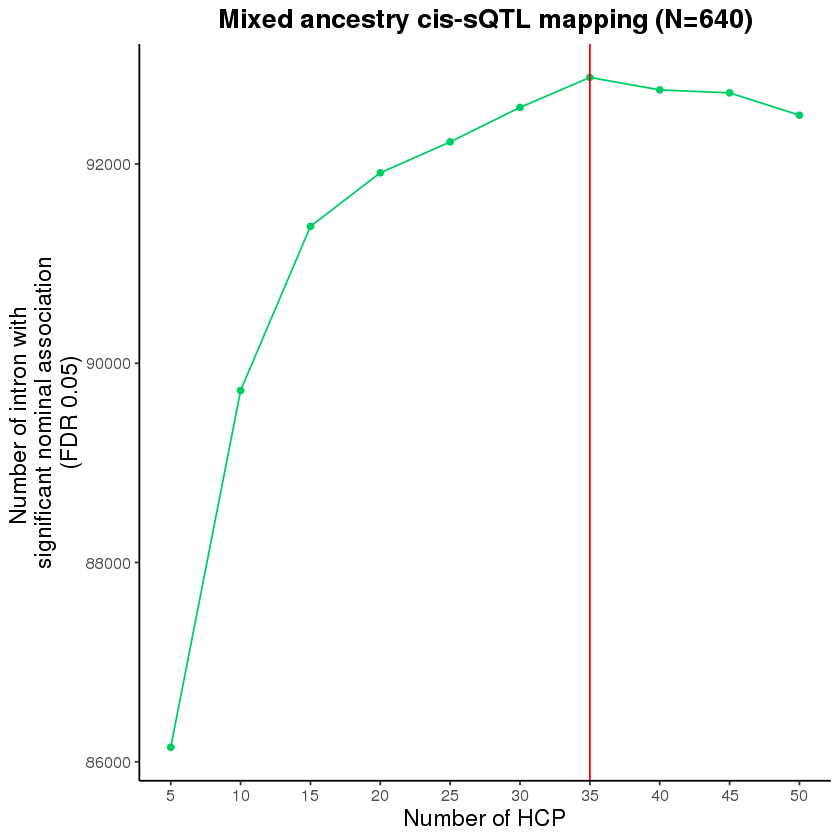

In [5]:
df <- data.frame("HCP" = seq(5, 50, 5),
                 "Count" = NA)
for (i in seq(5, 50, 5)) {
    df[i/5, "Count"] <- read.table(paste0("~/project-gandalm/isoform_twas/sqtl_new/results/mixed_nominal_", i, 
                                           "hcp/significant_feature_count.txt"))[,1]
}
df

p1 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "springgreen3") +
    geom_line(aes(x=HCP, y=Count), color = "springgreen3") +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_vline(xintercept = 35, color = "red") +
    labs(title = "Mixed ancestry cis-sQTL mapping (N=640)",
         x = "Number of HCP",
         y = "Number of intron with \nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=14),
          plot.title = element_text(size=16, face="bold", hjust = 0.5))
p1

In [8]:
ggsave("~/project-gandalm/isoform_twas/sqtl_new/figures/mixed_nominal.png", p1, width = 6, height = 6)

### 2: Check batch effect
Remove relatives as did not generate files without relatives, used --exclude-samples in FastQTL instead.

In [2]:
datExpr <- fread("~/project-gandalm/isoform_twas/sqtl_new/cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]

Warning message in fread("~/project-gandalm/isoform_twas/sqtl_new/cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.tsv", :
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [3]:
head(datExpr)

,Br2410,1513,RNAID1940,RNAID1946,Br1800,11237,18015,11149,1821,RNAID1927,⋯,11397,11880,RNAID1951,15240,RNAID1907,1733,11793,11451,RNAID1944,1746
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1:14829:14930:clu_7637_NA,-0.7624343,-0.4270108,1.6281660,-0.3610890,0.12970916,-0.7068511,0.6120102,0.7145593,-0.3963618,0.1793225,⋯,-0.46691056,0.1281325,-0.6323465,1.1516062,0.5373307,-0.5564796,1.0873845,0.5339986,-0.4799547,0.3919791
1:14829:14970:clu_7637_NA,0.8002152,0.8051742,-0.7684091,0.8834424,-0.34494925,0.4919904,-1.8686184,-1.7530881,0.8429926,-1.3582313,⋯,-0.06677221,0.6614452,0.6134831,-0.9416921,-0.9971887,0.6685070,0.6680873,-1.5665103,0.7542310,-0.9647780
1:14829:15021:clu_7637_NA,-0.8709895,-0.5238565,0.2172191,-0.4611636,-0.02537779,-0.3643302,1.1308208,-0.1863440,-0.4949154,0.4425828,⋯,0.05487654,-0.4111235,-0.7240991,0.1446305,1.0215702,-0.6478942,0.1923487,-1.1055001,-0.5755310,0.7907820
1:14829:15796:clu_7637_NA,-0.8283478,-0.4560950,0.2010250,-0.3924181,-0.02743139,-0.3435302,1.1683318,-0.2329144,-0.4253269,0.4229222,⋯,-0.03192361,-0.3376277,-0.6120497,-0.6299210,0.9815394,-0.5672837,0.1145237,-0.9251284,-0.4975410,0.7571724
1:15038:15796:clu_7637_NA,-1.4947229,-0.5166798,-1.5522815,-0.4363100,0.62672548,-0.4509515,1.7672359,0.5920107,-0.4778459,1.5358395,⋯,0.40185990,-0.3410882,-0.7135180,0.1596653,1.4284529,-0.6570166,-0.6128119,0.4997270,-0.5689909,1.1294720
1:15942:16607:clu_7638_NA,2.4746864,-0.5342547,-0.4351503,0.1753570,-0.82305050,-0.3783636,1.5144772,1.5025863,1.5222648,1.4150157,⋯,0.53904312,-0.8173156,1.1134906,-0.3239236,-0.7224049,1.3239560,0.7139717,-0.4593229,-0.6143907,-0.2557509


In [4]:
dim(datExpr)

[1] 273167    654

In [5]:
rel <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/related.txt", header = F, stringsAsFactors = F)[,1]
rel

[1] "1614"   "11602"  "Br1779" "Br2394" "Br2402" "Br2411" "Br2412" "1713"  
 [9] "11841"  "Br1794" "HSB148" "HSB107" "HSB154" "HSB100"

In [6]:
datExpr <- datExpr %>% select(-all_of(rel))
dim(datExpr)

[1] 273167    640

In [7]:
datExpr_noCombat <- fread("~/project-gandalm/isoform_twas/sqtl_new/cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]
datExpr_noCombat <- datExpr_noCombat %>% select(-all_of(rel))
dim(datExpr_noCombat)

Warning message in fread("~/project-gandalm/isoform_twas/sqtl_new/cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj.tsv", :
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 273167    640

In [8]:
# leafcutter PC
pcs <- fread("~/project-gandalm/isoform_twas/sqtl_new/cluster/leafcutter_perind.counts.nochr.gz.PCs", data.table = F)

In [9]:
rownames(pcs) <- pcs$id
pcs <- pcs[,-1]
head(pcs)

,Br2410.STARAligned.sortedByCoord.WASPfiltered.out.bam,1513.STARAligned.sortedByCoord.WASPfiltered.out.bam,RNAID1940.STARAligned.sortedByCoord.WASPfiltered.out.bam,RNAID1946.STARAligned.sortedByCoord.WASPfiltered.out.bam,Br1800.STARAligned.sortedByCoord.WASPfiltered.out.bam,11237.STARAligned.sortedByCoord.WASPfiltered.out.bam,18015.STARAligned.sortedByCoord.WASPfiltered.out.bam,11149.STARAligned.sortedByCoord.WASPfiltered.out.bam,1821.STARAligned.sortedByCoord.WASPfiltered.out.bam,RNAID1927.STARAligned.sortedByCoord.WASPfiltered.out.bam,⋯,11397.STARAligned.sortedByCoord.WASPfiltered.out.bam,11880.STARAligned.sortedByCoord.WASPfiltered.out.bam,RNAID1951.STARAligned.sortedByCoord.WASPfiltered.out.bam,15240.STARAligned.sortedByCoord.WASPfiltered.out.bam,RNAID1907.STARAligned.sortedByCoord.WASPfiltered.out.bam,1733.STARAligned.sortedByCoord.WASPfiltered.out.bam,11793.STARAligned.sortedByCoord.WASPfiltered.out.bam,11451.STARAligned.sortedByCoord.WASPfiltered.out.bam,RNAID1944.STARAligned.sortedByCoord.WASPfiltered.out.bam,1746.STARAligned.sortedByCoord.WASPfiltered.out.bam
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.017877653,-0.03776007,-0.0399438994,-0.034840027,0.039216661,0.042777407,0.00680397,0.040025498,-0.040061559,-0.03555976,⋯,0.04530387,0.059778879,-0.03954167,0.024260750,-0.04293632,-0.042537193,0.063484036,0.025710804,-0.033731566,-0.035502193
2,-0.027452747,-0.01357190,0.0002581652,-0.019766457,0.027710613,-0.050325371,0.05389210,-0.072974457,0.004356379,-0.02349720,⋯,-0.06266808,-0.032072332,-0.01300548,0.051624442,-0.01422004,-0.005643015,-0.030736006,-0.034915758,-0.027837885,-0.006428364
3,-0.065225429,0.02325125,0.0097687261,-0.012431315,-0.073467006,-0.002228612,0.06243331,-0.002567316,-0.028787573,0.01190221,⋯,0.02122932,-0.024992858,0.01291135,0.068553202,0.02339379,0.006006447,0.007709241,-0.049077223,0.001686122,0.003055421
4,-0.004633336,0.02774224,0.0240381892,0.039650198,0.051032396,-0.070285103,-0.06059388,-0.060115612,0.013812787,0.04095058,⋯,-0.04142289,-0.028879263,0.02230249,-0.055171281,0.03737948,0.017359515,-0.024020781,-0.033359065,0.036373508,0.025964255
5,-0.009158523,0.02910215,-0.0219780554,0.028450880,0.002987474,0.008799072,-0.01515512,0.025253912,-0.014393287,0.01796297,⋯,0.05543516,-0.055322036,-0.07368691,-0.007631145,-0.03650489,-0.033830322,-0.017014639,-0.001806438,0.025002470,-0.084750434
6,-0.074177559,0.04091055,-0.0292489468,0.001017282,-0.046841223,0.023123895,0.02886275,0.005371299,0.021059925,0.02115725,⋯,0.03097390,-0.002297913,-0.03509165,0.016848183,-0.03355458,0.040141142,0.033118419,-0.042348883,0.011492217,0.020540929


In [10]:
dim(pcs)

[1]  50 654

In [11]:
subj <- colnames(pcs)
for(i in 1:length(subj)){
    subj[i] <- strsplit(subj[i],"[.]")[[1]][1]
}
index <- which(colnames(pcs)=="1707.1.STARAligned.sortedByCoord.out.bam")
subj[index] <- "1707.1"
colnames(pcs) <- subj

In [12]:
head(pcs)

,Br2410,1513,RNAID1940,RNAID1946,Br1800,11237,18015,11149,1821,RNAID1927,⋯,11397,11880,RNAID1951,15240,RNAID1907,1733,11793,11451,RNAID1944,1746
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.017877653,-0.03776007,-0.0399438994,-0.034840027,0.039216661,0.042777407,0.00680397,0.040025498,-0.040061559,-0.03555976,⋯,0.04530387,0.059778879,-0.03954167,0.024260750,-0.04293632,-0.042537193,0.063484036,0.025710804,-0.033731566,-0.035502193
2,-0.027452747,-0.01357190,0.0002581652,-0.019766457,0.027710613,-0.050325371,0.05389210,-0.072974457,0.004356379,-0.02349720,⋯,-0.06266808,-0.032072332,-0.01300548,0.051624442,-0.01422004,-0.005643015,-0.030736006,-0.034915758,-0.027837885,-0.006428364
3,-0.065225429,0.02325125,0.0097687261,-0.012431315,-0.073467006,-0.002228612,0.06243331,-0.002567316,-0.028787573,0.01190221,⋯,0.02122932,-0.024992858,0.01291135,0.068553202,0.02339379,0.006006447,0.007709241,-0.049077223,0.001686122,0.003055421
4,-0.004633336,0.02774224,0.0240381892,0.039650198,0.051032396,-0.070285103,-0.06059388,-0.060115612,0.013812787,0.04095058,⋯,-0.04142289,-0.028879263,0.02230249,-0.055171281,0.03737948,0.017359515,-0.024020781,-0.033359065,0.036373508,0.025964255
5,-0.009158523,0.02910215,-0.0219780554,0.028450880,0.002987474,0.008799072,-0.01515512,0.025253912,-0.014393287,0.01796297,⋯,0.05543516,-0.055322036,-0.07368691,-0.007631145,-0.03650489,-0.033830322,-0.017014639,-0.001806438,0.025002470,-0.084750434
6,-0.074177559,0.04091055,-0.0292489468,0.001017282,-0.046841223,0.023123895,0.02886275,0.005371299,0.021059925,0.02115725,⋯,0.03097390,-0.002297913,-0.03509165,0.016848183,-0.03355458,0.040141142,0.033118419,-0.042348883,0.011492217,0.020540929


In [13]:
# pcs <- pcs %>% select(-all_of(rel))
# dim(pcs)
sum(colnames(pcs) %in% rel)
pcs <- pcs[,!names(pcs)%in%rel]
dim(pcs)

[1] 14

[1]  50 640

In [14]:
cov <- read.table("~/project-gandalm/isoform_twas/sqtl_new/data/35hcp_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
dim(cov)
head(cov)

[1]  42 654

,Br2410,1513,RNAID1940,RNAID1946,Br1800,11237,18015,11149,1821,RNAID1927,⋯,11397,11880,RNAID1951,15240,RNAID1907,1733,11793,11451,RNAID1944,1746
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PC1,0.0134498,0.00883737,0.0105646,-0.0100042,-0.0264156,0.00964951,-0.0305498,0.009554,0.0125086,0.00967876,⋯,0.00699529,0.00927248,0.0100571,0.0126193,-0.022778,0.0109438,0.00721341,0.00797005,0.0108942,-0.00792391
PC2,-0.0261084,-0.00241496,0.0112017,0.0129359,-0.00285026,-0.0204621,-0.00136264,-0.0212812,-0.0213104,0.0282592,⋯,-0.0165036,-0.0199631,0.00285186,-0.0222361,-0.00425556,-0.0140367,-0.00334149,-0.0197482,-0.0146632,-0.0111467
PC3,-0.00626668,-0.021557,-0.00268095,-4.52633e-05,-0.00101463,-0.00514834,-0.000380779,-0.00498539,-0.00520913,-0.00130432,⋯,0.00345509,-0.0035407,-0.0286316,-0.00414057,-0.00136336,-0.0110339,0.0224404,-0.00454864,-0.0107195,-0.00225043
PC4,0.0144448,-0.0266302,0.0116105,0.00637793,0.00137324,0.0214545,0.00128887,0.0227153,0.0104166,0.0125259,⋯,0.0174746,0.0220455,-0.0386816,0.0128115,0.000375508,-0.00457751,0.00286154,0.0225033,-0.00350128,0.00555587
PC5,-0.0153651,-0.00174134,-0.00695816,-0.00397614,-0.00378136,0.0668738,-0.0017333,0.0678296,-0.0156755,-0.00241945,⋯,0.0709577,0.0691673,0.00281472,-0.0166991,-0.00515377,-0.0107143,0.0806309,0.06695,-0.00934632,-0.00967133
sex,M,M,M,F,M,M,F,F,F,F,⋯,F,M,F,F,M,F,M,M,F,M


In [15]:
cov <- cov[,!names(cov)%in%rel]
dim(cov)

[1]  42 640

In [16]:
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

In [17]:
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [18]:
pcs <- t(pcs)
pcs <- cbind(1, pcs)
storage.mode(pcs) <- "numeric"

Y <- as.matrix(datExpr_noCombat)
X <- as.matrix(pcs)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed_pcs <- Y - t(X[,-1]  %*% beta[-1,])

In [19]:
walker <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt")
obrien <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt")
werling <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt")
hdbr <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt")
libd <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt")

groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

In [20]:
# center the data; use SVD to calculate PCs
# regressed by covariates
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)

# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)

# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

In [21]:
# regressed by leafcutter PCs
s_3 <- svd(datExpr_regressed_pcs - rowMeans(datExpr_regressed_pcs))
PC1_3 <- s_3$d[1]*s_3$v[,1]
PC2_3 <- s_3$d[2]*s_3$v[,2]
data3 <- data.frame(PC1_3, PC2_3, "Data" = groups_fac)

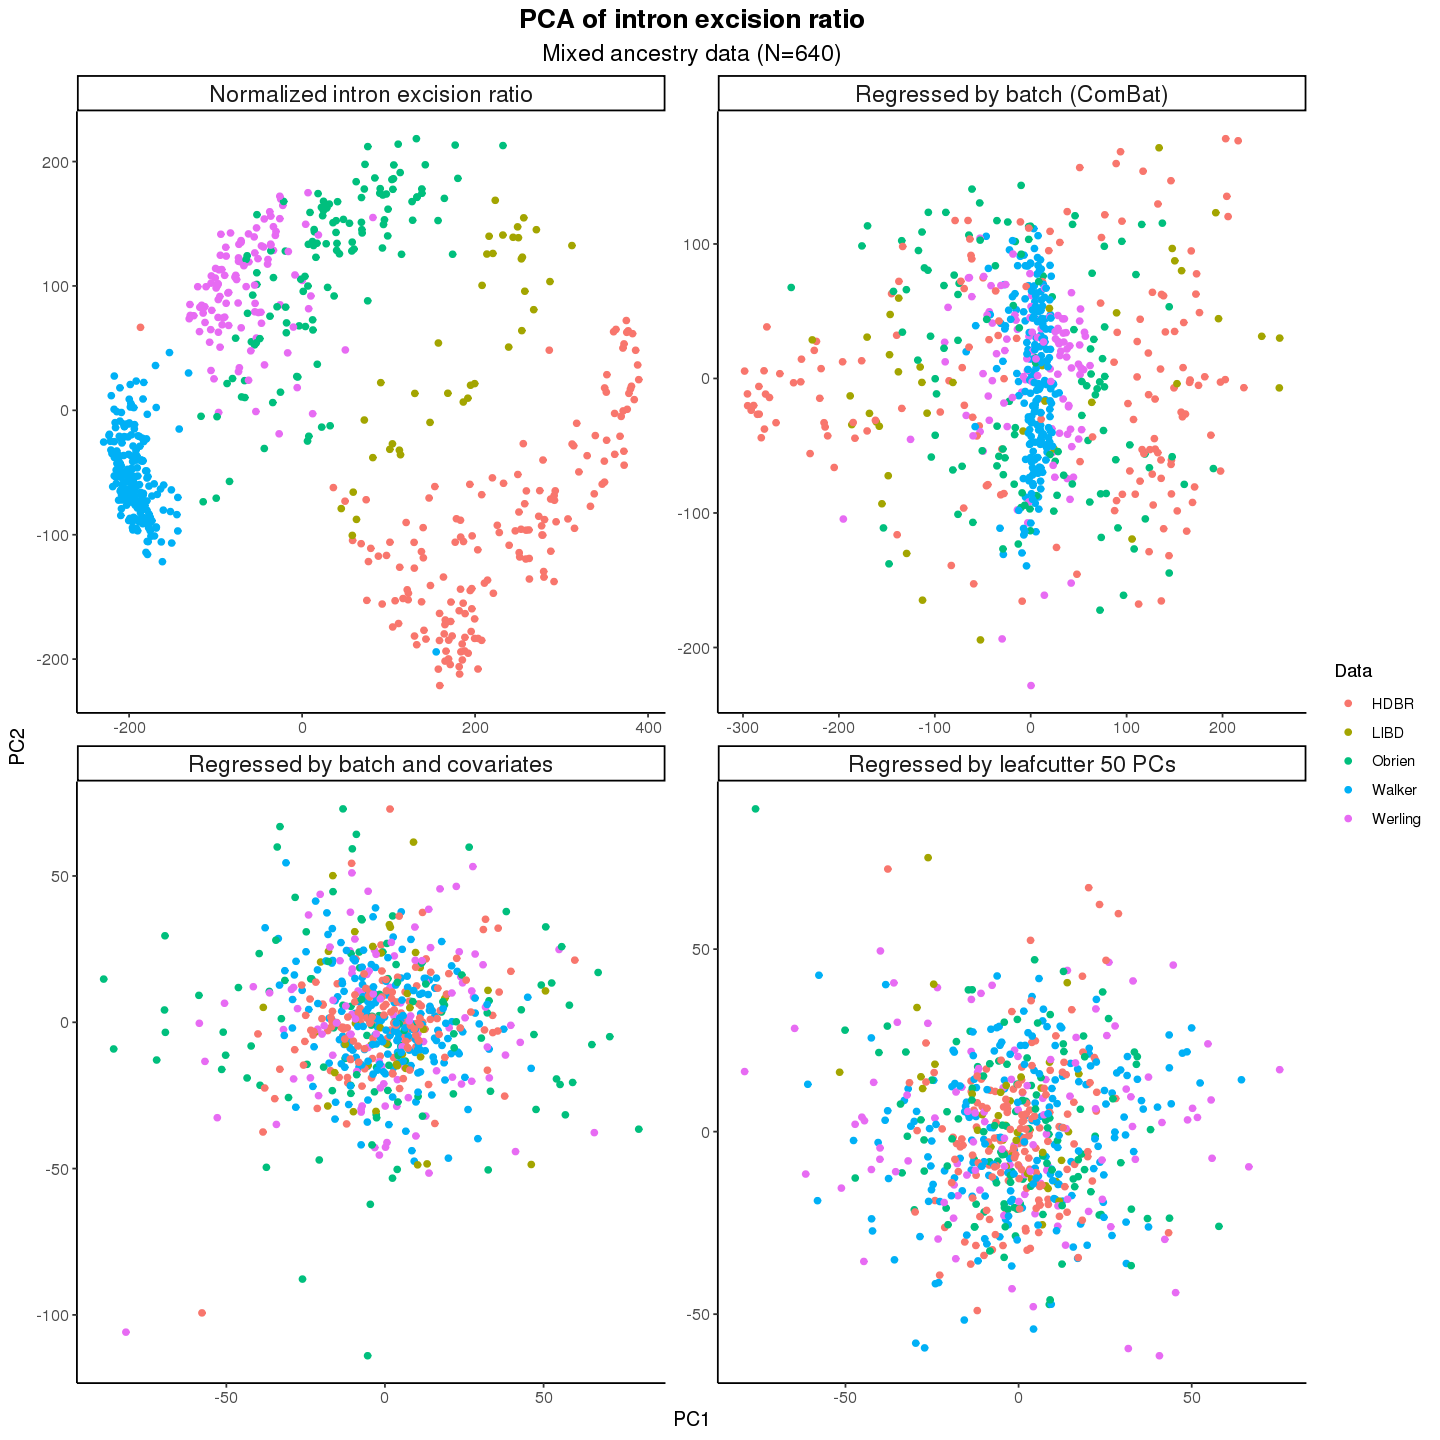

In [22]:
options(repr.plot.width=12, repr.plot.height=12)

colnames(data1) <- colnames(data2) <- colnames(data3) <- c("PC1", "PC2", "Data")
data4 <- rbind(data, data1, data2, data3)

data4$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized intron excision ratio", dim(data2)[1]),
                 rep("Regressed by leafcutter 50 PCs", dim(data3)[1]))
p2 <- ggplot(data4, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of intron excision ratio",
       subtitle = "Mixed ancestry data (N=640)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p2

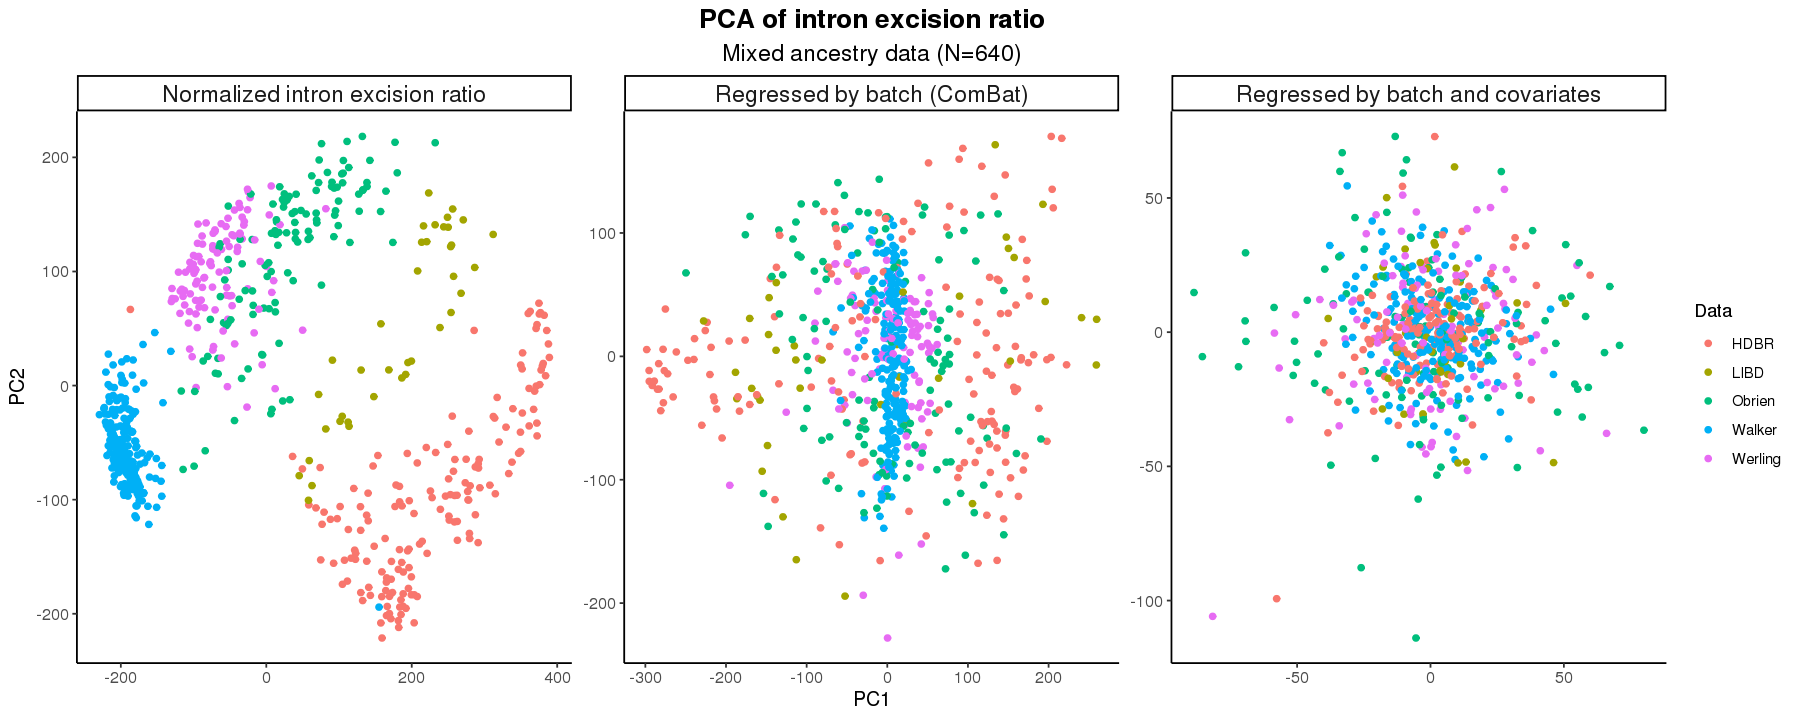

In [23]:
options(repr.plot.width=15, repr.plot.height=6)

# colnames(data1) <- colnames(data2) <- colnames(data3) <- c("PC1", "PC2", "Data")
data5 <- rbind(data, data1, data2)

data5$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized intron excision ratio", dim(data2)[1]))
p3 <- ggplot(data5, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of intron excision ratio",
       subtitle = "Mixed ancestry data (N=640)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p3

In [24]:
ggsave("~/project-gandalm/isoform_twas/sqtl_new/figures/mixed_regress.png", p3, width = 15, height = 6)